In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 2 Getting Started with Image Processing with Python.
 Introduction to Python Imaging Library(PIL)
 2.1 Exercise- 1

 Complete all the Task.
 1. Read and display the image.
 • Read the image using the Pillow library and display it.

In [ ]:
!pip install pillow


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

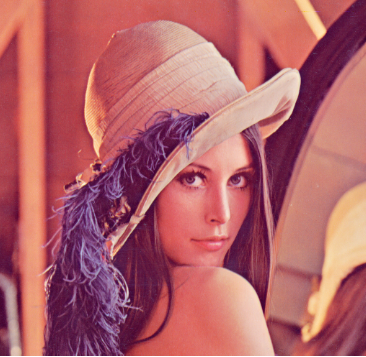

In [5]:
image_colored = Image.open("/content/drive/MyDrive/AI And ML/lenna_image.png")
image_colored = image_colored.convert("RGB")
display(image_colored)

 2. Display only the top left corner of 100x100 pixels.
 • Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
 Array Indexing.

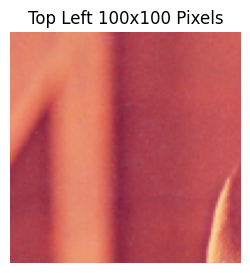

In [6]:
#To extract  top left corner image and display the top-left 100x100 pixels
image_array = np.array(image_colored)
top_left_corner = image_array[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left_corner)
plt.title("Top Left 100x100 Pixels")
plt.axis("off")
plt.show()

 3. Show the three color channels (R, G, B).
 • Separate the image into its three color channels (Red, Green, and Blue) and display them
 individually, labeling each channel as R, G, and B. Using NumPy.

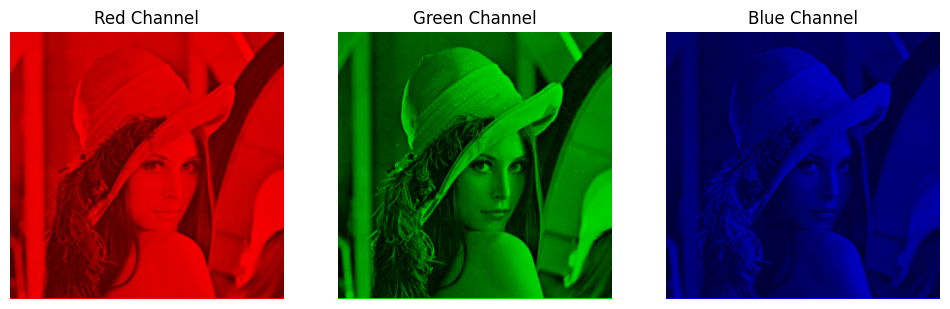

In [15]:
# Accessing individual channels (R, G, B)
red_channel = image_array.copy()
red_channel[:, :, 1:] = 0  # Set green and blue channels to 0

green_channel = image_array.copy()
green_channel[:, :, [0,2]] = 0  # Set red and blue channels to 0

blue_channel = image_array.copy()
blue_channel[:, :, :2] = 0  # Set red and green channels to 0

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(red_channel)
ax[0].set_title("Red Channel")
ax[0].axis("off")

ax[1].imshow(green_channel)
ax[1].set_title("Green Channel")
ax[1].axis("off")

ax[2].imshow(blue_channel)
ax[2].set_title("Blue Channel")
ax[2].axis("off")

plt.show()


 4. Modify the top 100 ×100 pixels to a value of 210 and display the resulting image:
 • Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
 light gray color), and then display the modified image.

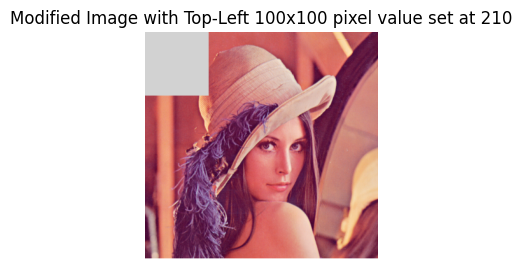

In [13]:
# Modifying the pixel values of top-left 100x100 pixels to 210 (light gray color)
modified_image = image_array.copy()
modified_image[:100, :100] = 210
plt.figure(figsize=(3, 3))
plt.imshow(modified_image)
plt.title("Modified Image with Top-Left 100x100 pixel value set at 210")
plt.axis("off")
plt.show()

2.2 Exercise- 2:
 Complete all the Task.

 1. Load and display a grayscale image.
 • Load a grayscale image using the Pillow library.
 • Display the grayscale image using matplotlib.

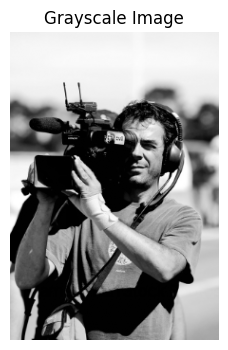

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#load to display grayscale image
grayscale_image_path = '/content/drive/MyDrive/AI And ML/camera_man.jpg'
grayscale_image = Image.open(grayscale_image_path).convert('L')
plt.figure(figsize=(4, 4))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

 2. Extract and display the middle section of the image (150 pixels).
 • Extract a 150 pixel section from the center of the image using NumPy array slicing.
 • Display this cropped image using matplotlib

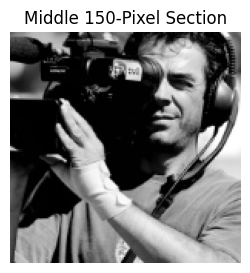

In [25]:
# Extract and display the middle section of the image by 150 pixel
#converting to numpy
grayscale_array = np.array(grayscale_image)

#read dimension of the image
height, width = grayscale_array.shape

#calculate for center point
center_x, center_y = width // 2, height // 2

#Defining 100 pixel crop size (150*150)
crop_size = 150
half_crop_size = crop_size // 2

# Extract the middle section of the image
crop_image = grayscale_array[center_y - half_crop_size : center_y + half_crop_size,
                             center_x - half_crop_size : center_x + half_crop_size]

plt.figure(figsize=(3,3))
plt.imshow(crop_image, cmap='gray')
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
 • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
 above 100 to 255 (creating a binary image).
 • Display the resulting binary image.

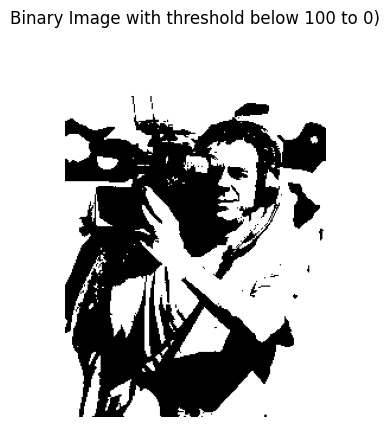

In [28]:
# Applying a simple threshold to create a binary image
binary_image = np.where(grayscale_array < 100, 0, 255).astype(np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image with threshold below 100 to 0)")
plt.axis("off")
plt.show()

 4. Rotate the image 90 degrees clockwise and display the result.
 • Rotatethe image by90degrees clockwise using the Pillow rotate method or by manipulating
 the image array.
 • Display the rotated image using matplotlib.

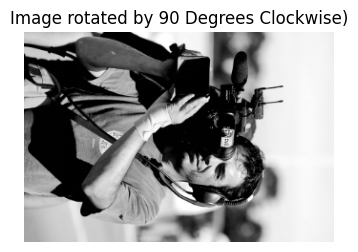

In [36]:
from PIL import Image
# Rotating the image 90 degrees clockwise
rotated_image = grayscale_image.rotate(-90, expand=True) # -90 value makes clockwise
plt.figure(figsize=(4, 4))
plt.imshow(rotated_image, cmap='gray')
plt.title("Image rotated by 90 Degrees Clockwise)")
plt.axis("off")
plt.show()

 5. Convert the grayscale image to an RGB image.
 • Convert the grayscale image into an RGB image where the grayscale values are replicated
 across all three channels (R, G, and B).
 • Display the converted RGB image using matplotlib.

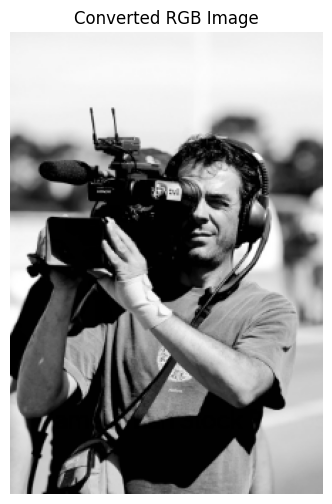

In [38]:
# Convert grayscale an RGB image
# Replicating the grayscale values over all RGB channels
rgb_img = np.stack([grayscale_array]*3, axis=-1)
plt.figure(figsize=(6, 6))

# Display the converted RGB Image
plt.imshow(rgb_img)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

 3 Image Compression and Decompression using PCA.
 In this exercise, build a PCA from scratch using explained variance method for image compression task.
 You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
 choice

 1. Load and Prepare Data:
 • Fetch an image of you choice.{If colour convert to grayscale}
 • Center the dataset- Standaridze the Data.
 • Calculate the covaraince matrix of the Standaridze data.

In [39]:
#importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

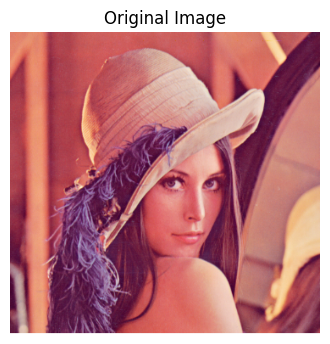

In [42]:
# Fetching and displaying the original colored image
image_path = '/content/drive/MyDrive/AI And ML/lenna_image.png'
image = Image.open(image_path)
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

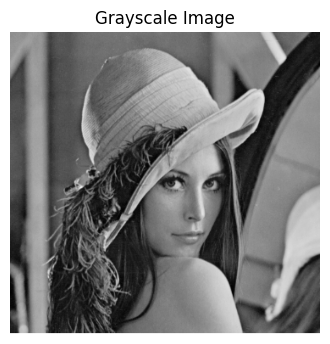

In [43]:
# Converting original image to grayscale
grayscale_image = image.convert('L')
plt.figure(figsize=(4, 4))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [45]:
# Converting grayscale image into numpry array
gray_array = np.array(grayscale_image, dtype=np.float32)

# Standardize retrieved data
mean = np.mean(gray_array, axis=0)
standard = np.std(gray_array, axis=0)
standardized_data = (gray_array - mean) / standard

# Calculating covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
print("Covariance Matrix:", cov_matrix)

Covariance Matrix: [[ 1.00280894  0.99477785  0.98056837 ... -0.22422317 -0.21915235
  -0.19698953]
 [ 0.99477785  1.00280858  0.99435832 ... -0.26145791 -0.25572047
  -0.2338844 ]
 [ 0.98056837  0.99435832  1.00280879 ... -0.28208329 -0.2757355
  -0.25468101]
 ...
 [-0.22422317 -0.26145791 -0.28208329 ...  1.00280809  0.99845242
   0.98810473]
 [-0.21915235 -0.25572047 -0.2757355  ...  0.99845242  1.00280902
   0.99811178]
 [-0.19698953 -0.2338844  -0.25468101 ...  0.98810473  0.99811178
   1.00280901]]


 2. Eigen Decomposition and Identifying Principal Components:
 • Compute Eigen Values and Eigen Vectors.
 • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
 the highest eigenvalues.
 • Identify the Principal Components with the help of cumulative Sum plot

Top k Eigen values: [79.55369819 55.52810725 31.6072732 ]
Top k Eigen vectors:
 [[-0.06782406  0.01139285  0.04718032]
 [-0.06553001  0.0062963   0.0439652 ]
 [-0.06387067  0.00302942  0.04186031]
 ...
 [ 0.01350613  0.11413912 -0.02311612]
 [ 0.01213479  0.11416824 -0.02140175]
 [ 0.0099206   0.11438601 -0.0198671 ]]


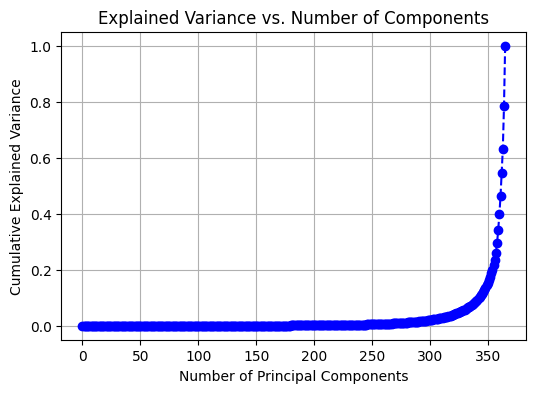

In [65]:
# Eigen decomposition by computing Eigen values and Eigen vectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sorting eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

#Select the top k eigenvectors corresponding to the largest eigenvalues
k = 3  # Set the number of top eigenvectors you want to select (e.g., 3)
top_k_eigenvalues = eigenvalues[sorted_indices][:k]
top_k_eigenvectors = eigenvectors[:, sorted_indices][:, :k]

# Display the top k Eigen values and eigen vectors
print("Top k Eigen values:", top_k_eigenvalues)
print("Top k Eigen vectors:\n", top_k_eigenvectors)

# Identifying the Principal Components with the help of cumulative Sum plot
# Computing Explained Variance for each Principal Component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculating the Cumulative sum of the Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the Cumulative Explained Variance
plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

 3. Reconstruction and Experiment:


• Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.
 • Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.
 • Display the Results and Evaluate

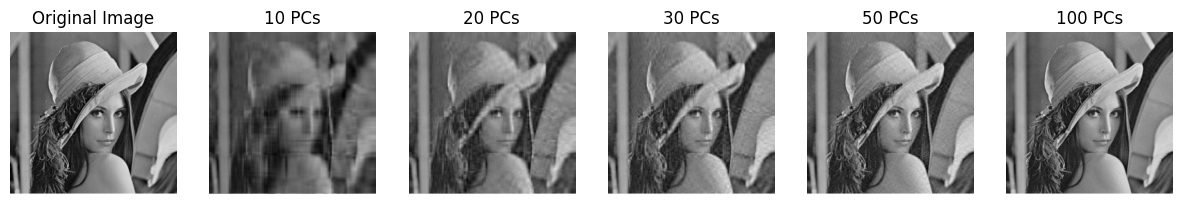

In [64]:
# Storing few numbers of components
component_list = [10, 20, 30, 50, 100] #Testing with principal components

# Preparing the plot
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Applying PCA to reconstruct and display results
for i, k in enumerate(component_list):

    # Applying PCA with k components
    pca = PCA(n_components=k)

    # Projecting the retrieved data into k PCs
    transformed = pca.fit_transform(standardized_data)

    # Inverse transformation to reconstruct the image from the transformed data
    reconstructed = pca.inverse_transform(transformed)

    # Destandardizing to original scale
    reconstructed_image = (reconstructed * standard) + mean

    # Reshape back to image shape
    reconstructed_image = reconstructed_image.reshape(gray_array.shape)

    # Displaying the reconstucted images
    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f"{k} PCs")
    axes[i + 1].axis("off")
plt.show()
